# **Load libraries**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# Modeling, Fitting and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans 
from datetime import datetime
import datetime
from sklearn import metrics

# **Load dataset**

In [39]:
df = pd.read_csv('ifood_df.csv')

# print first 5 rows 
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


In [42]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# **Data visualization**

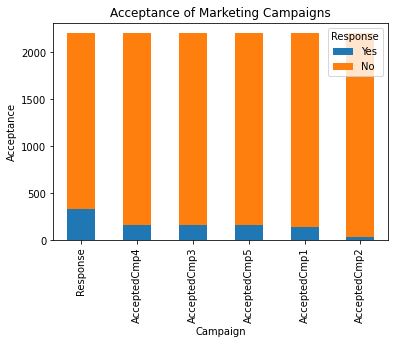

In [43]:
campaign = df.loc[:,['Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]

campaign = campaign.melt()
campaign = pd.crosstab(campaign["variable"], campaign["value"]).sort_values(0)

cols = list(campaign.columns)
a, b = cols.index(0), cols.index(1)
cols[b], cols[a] = cols[a], cols[b]
campaign = campaign[cols]

campaign.columns = "Yes","No"
campaign.plot.bar(stacked=True)
plt.title('Acceptance of Marketing Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Acceptance')
plt.legend(title='Response',loc='upper right')
plt.show()

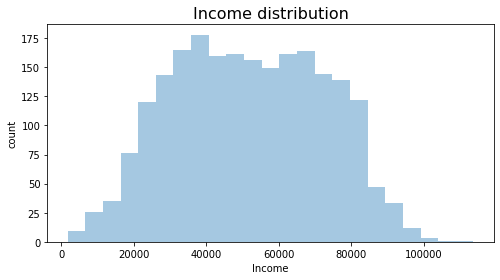

In [44]:
plt.figure(figsize = (8,4))
sns.distplot(df['Income'], kde = False, hist = True)
plt.title('Income distribution', size = 16)
plt.ylabel('count');

Text(0.5, 1.0, 'Last Campagin')

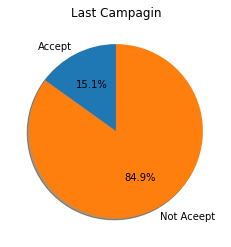

In [45]:
label = ['Accept', 'Not Aceept']
plt.pie([len(df['Response'] [df['Response'] == 1]), len(df['Response'] [df['Response'] == 0])], labels = label, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Last Campagin')

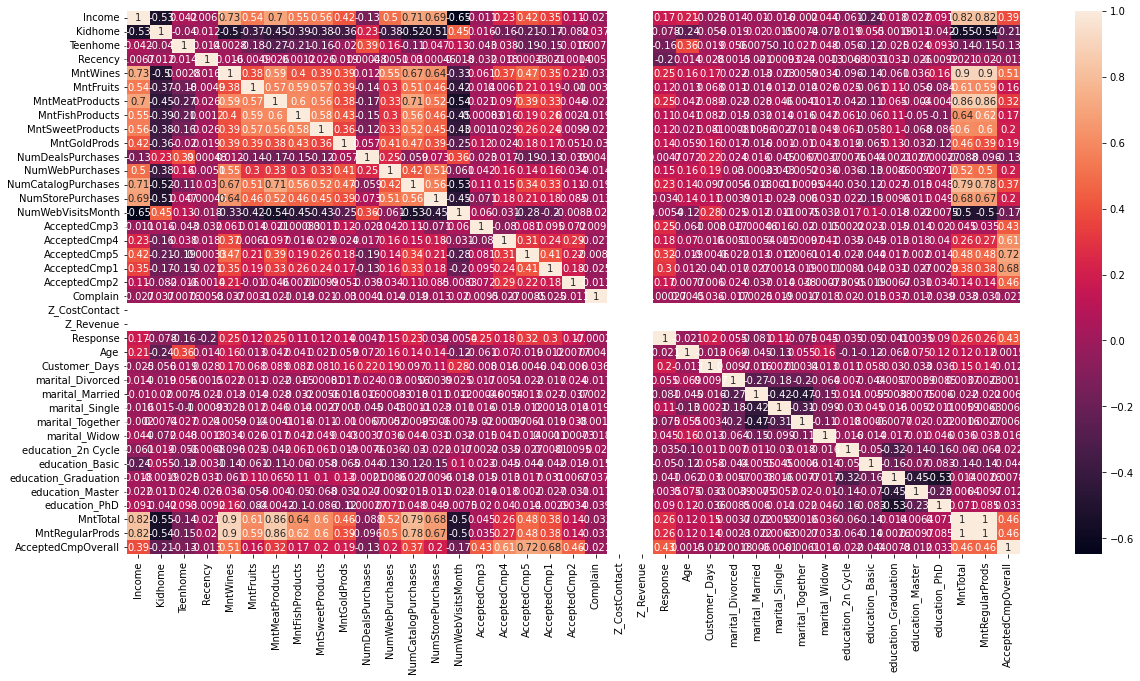

In [46]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [47]:
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)


In [48]:
for i in df.columns:
    if df[i].dtype == '<i8': 
        print('type int64:',i,'Mean:', int(df[i].mean()))
    else:
        print('type object:',i,'Mode:', df[i].mode()[0])

type object: Income Mode: 7500.0
type int64: Kidhome Mean: 0
type int64: Teenhome Mean: 0
type int64: Recency Mean: 49
type int64: MntWines Mean: 306
type int64: MntFruits Mean: 26
type int64: MntMeatProducts Mean: 165
type int64: MntFishProducts Mean: 37
type int64: MntSweetProducts Mean: 27
type int64: MntGoldProds Mean: 44
type int64: NumDealsPurchases Mean: 2
type int64: NumWebPurchases Mean: 4
type int64: NumCatalogPurchases Mean: 2
type int64: NumStorePurchases Mean: 5
type int64: NumWebVisitsMonth Mean: 5
type int64: AcceptedCmp3 Mean: 0
type int64: AcceptedCmp4 Mean: 0
type int64: AcceptedCmp5 Mean: 0
type int64: AcceptedCmp1 Mean: 0
type int64: AcceptedCmp2 Mean: 0
type int64: Complain Mean: 0
type int64: Response Mean: 0
type int64: Age Mean: 51
type int64: Customer_Days Mean: 2512
type int64: marital_Divorced Mean: 0
type int64: marital_Married Mean: 0
type int64: marital_Single Mean: 0
type int64: marital_Together Mean: 0
type int64: marital_Widow Mean: 0
type int64: educat

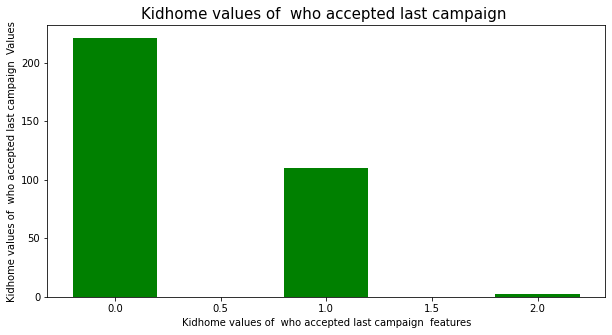

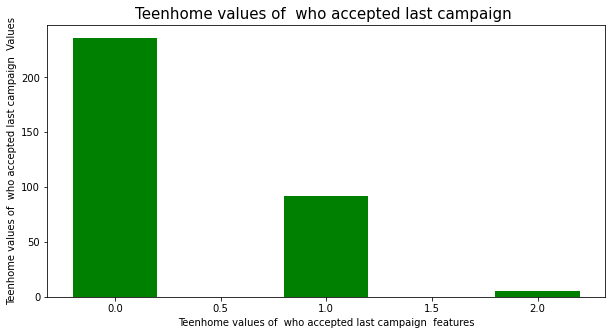

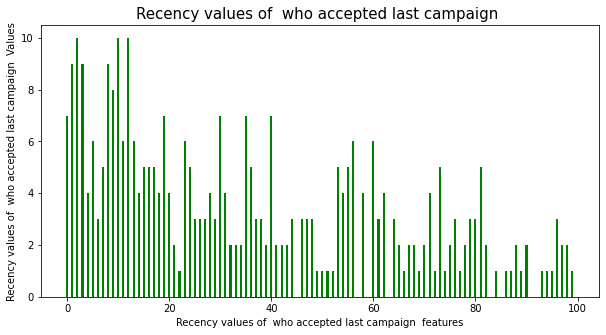

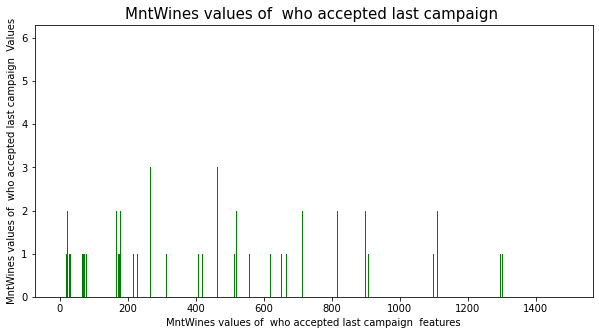

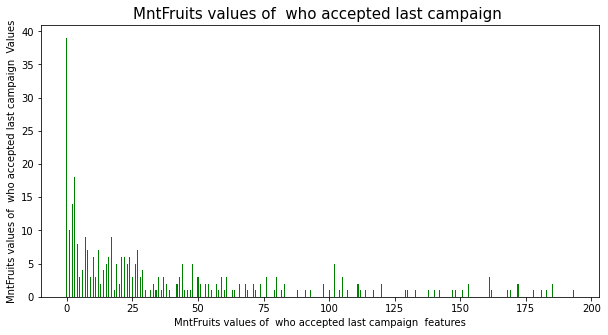

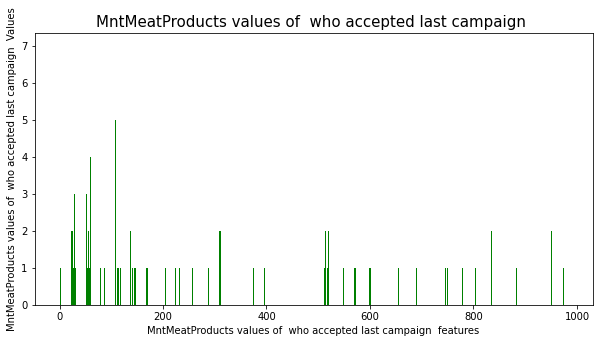

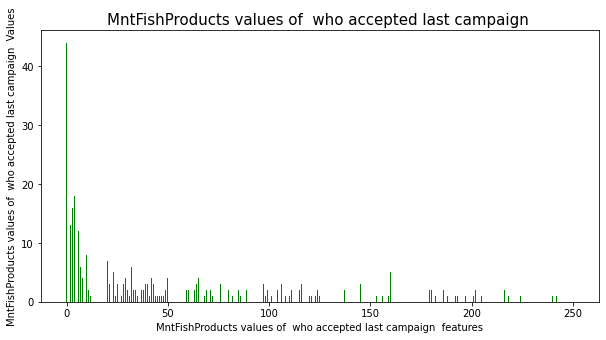

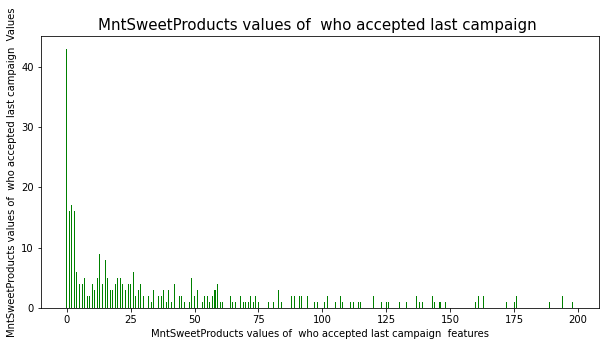

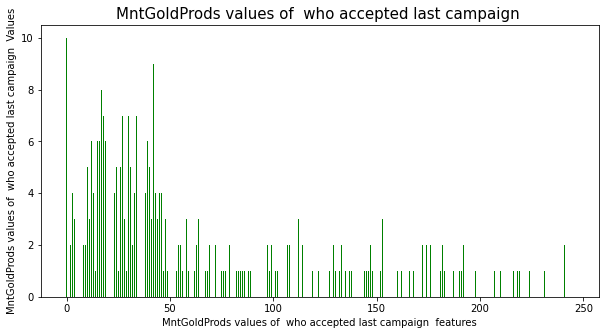

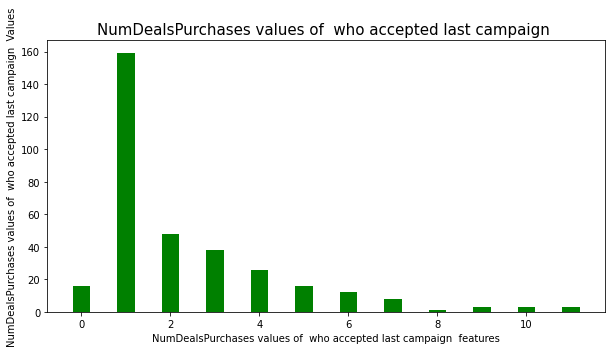

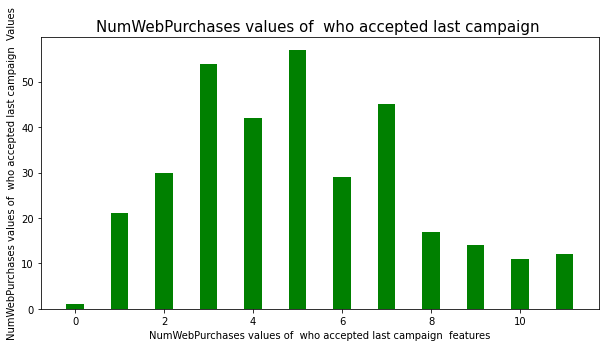

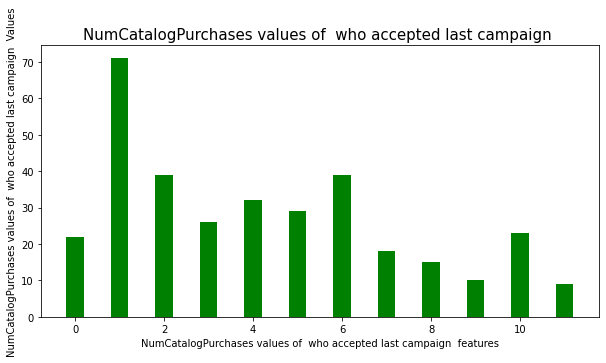

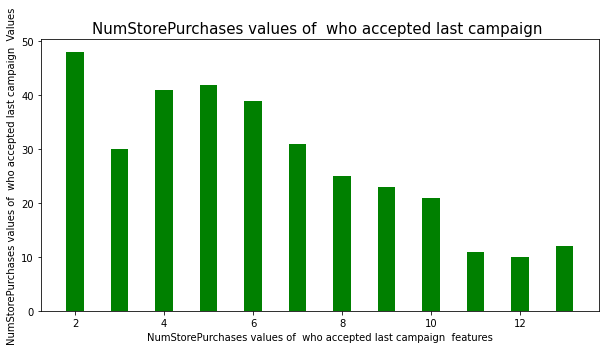

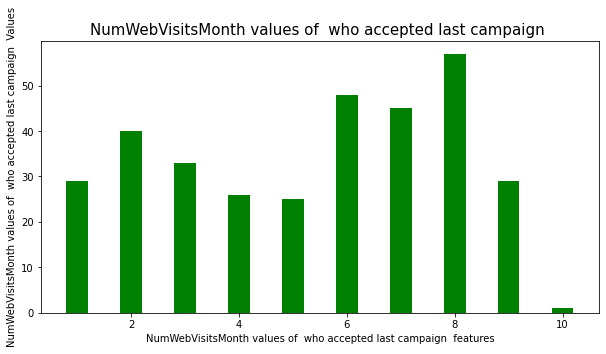

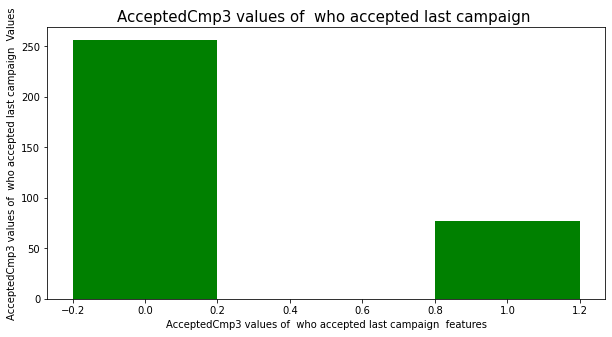

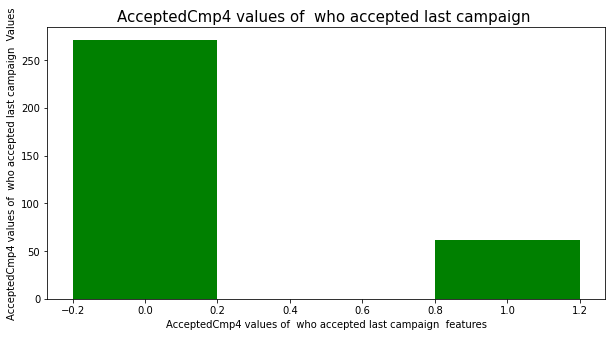

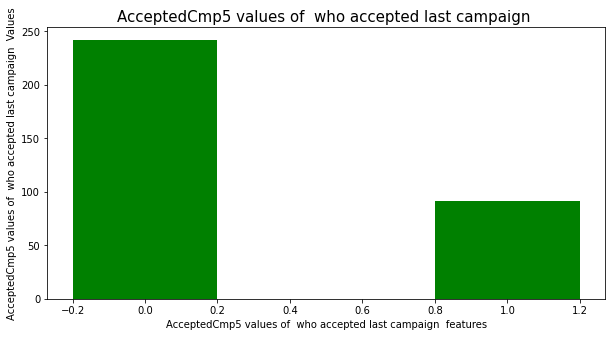

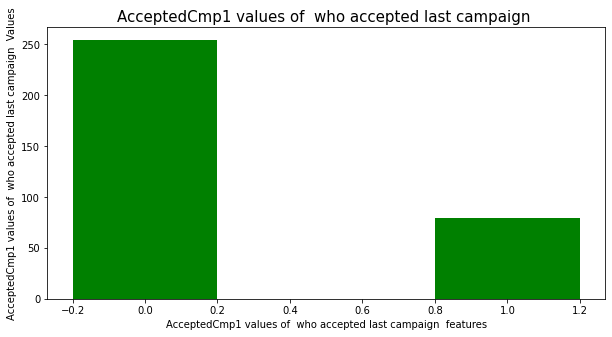

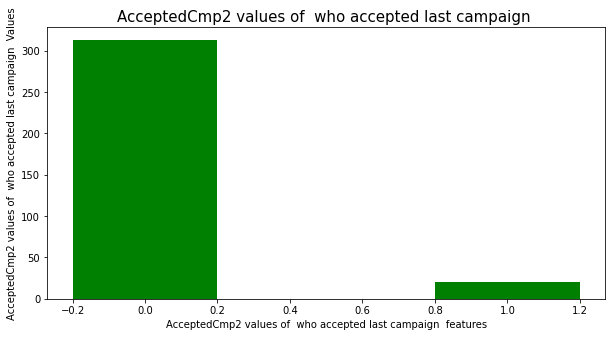

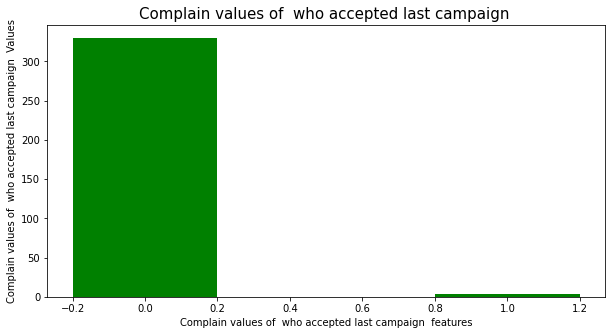

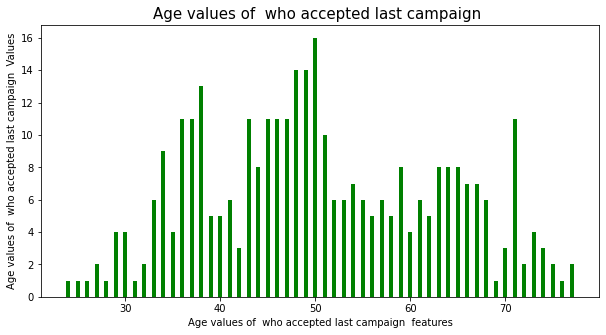

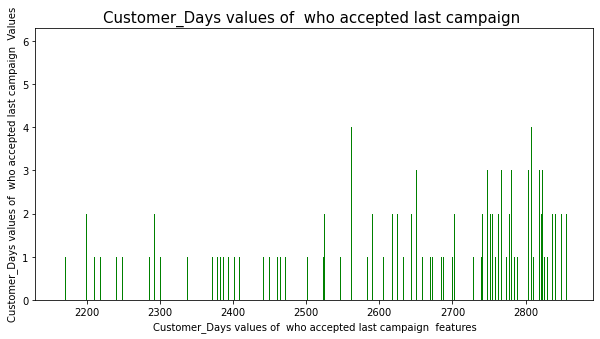

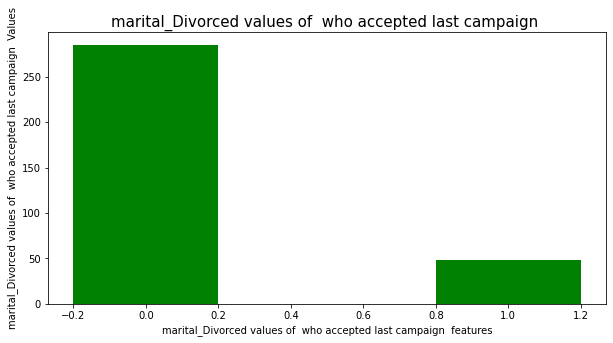

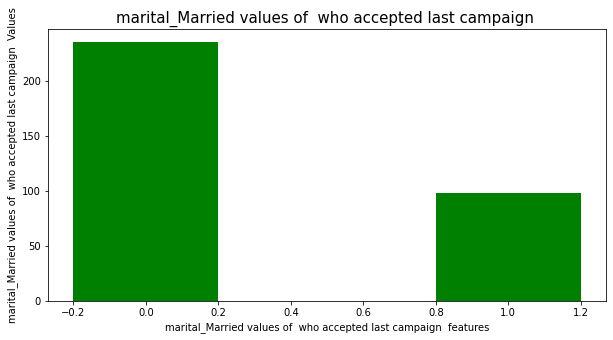

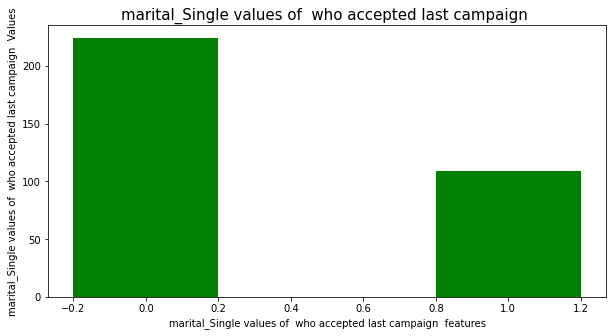

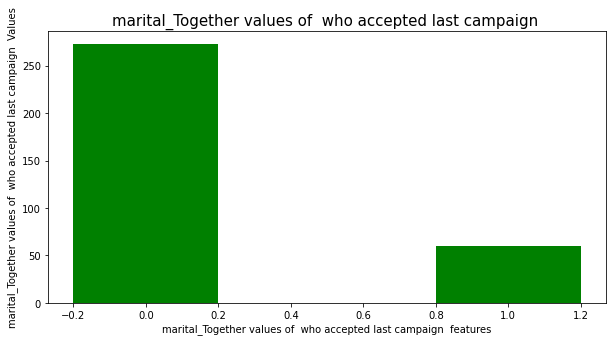

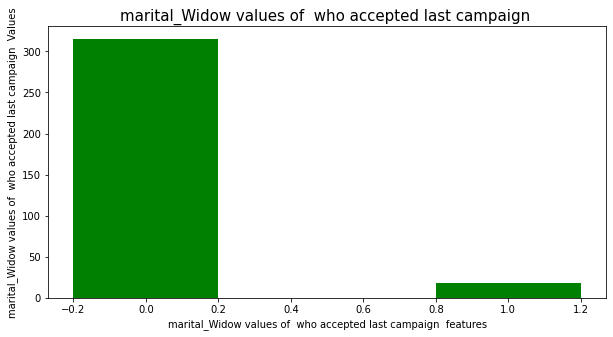

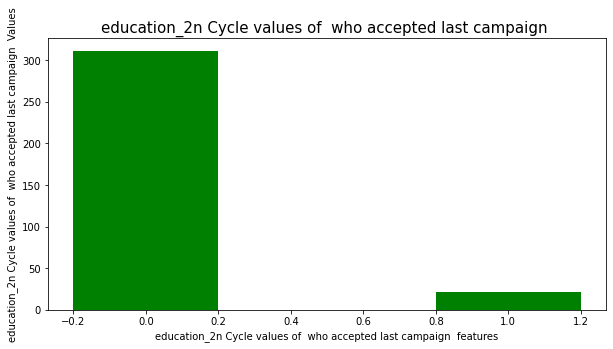

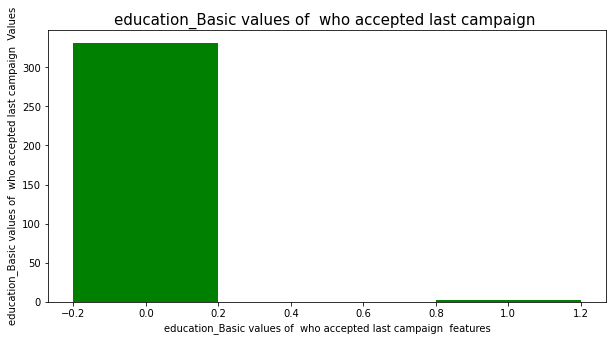

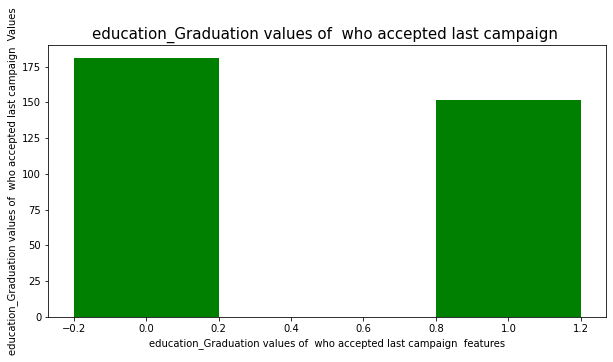

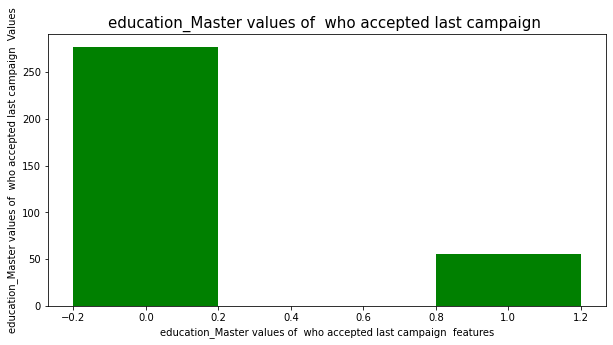

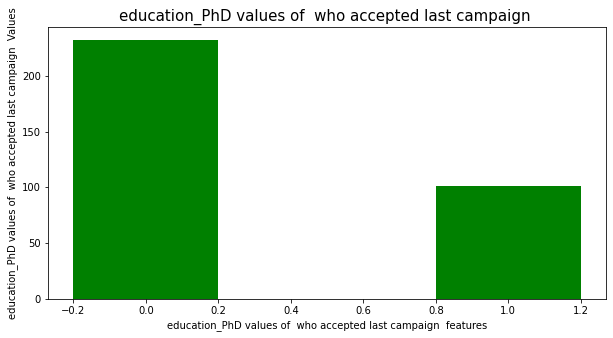

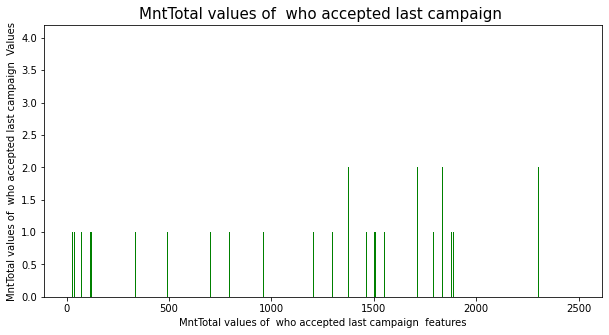

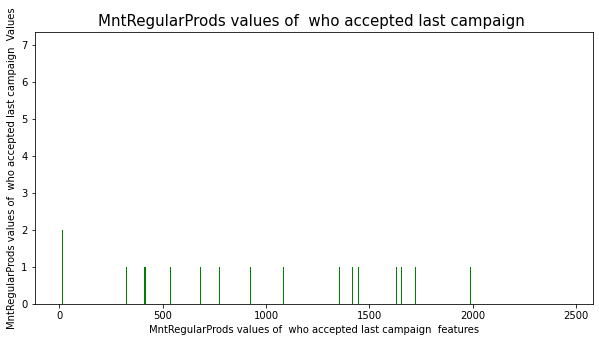

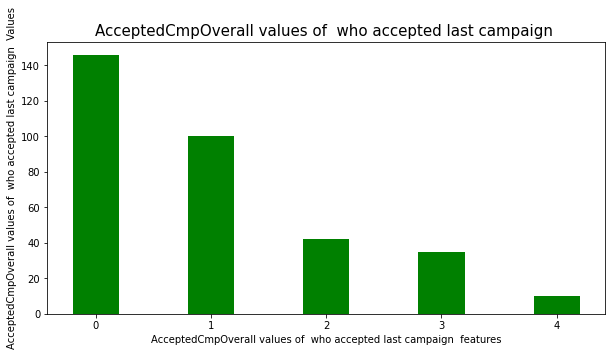

In [49]:
for _ in df.columns:
    if _=='Response'or _=='Income':
        pass
    else:
        fig = plt.figure(figsize = (10, 5))
        uniqe_list=[i for i in df[df['Response']==1][f'{_}'].unique()]
        uniqe_values=[len(df[df['Response']==1][f'{_}'][df[df['Response']==1][f'{_}']==i]) for i in df[df['Response']==1][f'{_}'].unique()]

        plt.bar(uniqe_list, uniqe_values, color ='green',width = 0.4)
        plt.xlabel(f"{_} values of  who accepted last campaign  features",fontsize=10)
        plt.ylabel(f"{_} values of  who accepted last campaign  Values",fontsize=10)
        plt.title(f"{_} values of  who accepted last campaign ",fontsize=15);

In [50]:
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

mnt_cols = [col for col in df.columns if 'Mnt' in col]

channel_cols = [col for col in df.columns if 'Num' in col] 

In [51]:
demographics = pd.DataFrame(round(df.drop(columns = binary_cols + mnt_cols + channel_cols).mean(), 1), columns = ['Average']).reindex(['Income',  'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Income,51622.1
Kidhome,0.4
Teenhome,0.5
Recency,49.0


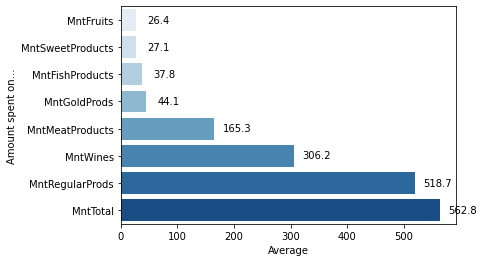

In [52]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns = ['Average']).sort_values(by = 'Average').reset_index()

spending

ax = sns.barplot(x = 'Average', y = 'index', data = spending, palette = 'Blues')
plt.ylabel('Amount spent on...')

for p,q in zip(ax.patches, spending['Average']):
    ax.text(x = q + 40,
            y = p.get_y() + 0.5,
            s = q,
            ha = "center") ;

In [53]:
for i in df.columns:
    result = df[i].unique()
    print (i,'\n',result,'\n')


Income 
 [58138. 46344. 71613. ... 56981. 69245. 52869.] 

Kidhome 
 [0 1 2] 

Teenhome 
 [0 1 2] 

Recency 
 [58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 78 77 81 80 45 14 52 98 93 50 60 11 66 97 62  6 33
 22 71 67  7] 

MntWines 
 [ 635   11  426  173  520  235   76   14   28    6  194  233    3 1006
   53   84 1012    4   86    1  867  384  270   36  684    8  112  110
   96  482   40  702   55  437  421   13    9  123  826  245  650   12
  510  328  984  295  447  712  452  523  546  398   10  688  247  856
  496  258  565    2  721 1032  577   64   25  163   17  130  292  350
  135   15   27    5  505   51  207   41  386  562  217  144  454  425
 1332  527  490  378  547   47  320   34  722  162  450   70  492  120
  534  236  220  796    0  962  738  399  614   32  598   73   42  346
  8

# **Data preparation to build models**

In [54]:
x = df.drop('Response', axis =1)
y = df.Response

print('X shape: {}'.format(x.shape))

print('Y shape: {}'.format(y.shape))

X shape: (2205, 36)
Y shape: (2205,)


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print('X train shape: {}'.format(x_train.shape))
print('X test shape: {}'.format(x_test.shape))

print('Y train shape: {}'.format(y_train.shape))
print('Y test shape: {}'.format(y_test.shape))

X train shape: (1653, 36)
X test shape: (552, 36)
Y train shape: (1653,)
Y test shape: (552,)


In [56]:
obje_ss = StandardScaler()

x_train_ss = obje_ss.fit_transform(x_train)
x_test_ss = obje_ss.fit_transform(x_test)

# **Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le = LogisticRegression(random_state = 42, max_iter = 10000)
model_le.fit(x_train, y_train)
parameters = {'C' : [0.8, 0.9, 1, 1.1, 1.2]}
model_le_grid = GridSearchCV(model_le, parameters, cv = 10, verbose = 1, n_jobs = -1).fit(x_train, y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:', model_le.score(x_train,y_train) * 100)
print('Logistic Regression Cros validation score:', model_le_grid.best_score_ * 100)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'C': 1}
Logistic Regression Train score: 86.44888082274652
Logistic Regression Cros validation score: 87.1190215407083


In [58]:
model_le = LogisticRegression(random_state = 42,C = 0.8)
model_le.fit(x_train,y_train)
pred = model_le.predict(x_test)

print('Logistic Regression Train score:', model_le.score(x_train, y_train) * 100)
print('Logistic Regression Test score:', model_le.score(x_test, y_test) * 100)
print('Accuracy score:', metrics.accuracy_score(y_test, pred) * 100)

Logistic Regression Train score: 84.63399879007865
Logistic Regression Test score: 87.13768115942028
Accuracy score: 87.13768115942028


In [59]:
pred = model_le.predict(x_test)
cm = metrics.confusion_matrix(y_test, pred)
print('confusion matrix\n', cm)

tp = cm[0][0]

fp = cm[0][1]

fn = cm[1][0]

tn = cm[1][1]

TPR = tp / (tp + fn)
print('\nTPR (True positive rate): %f' % TPR)

TNR = tn / (tn + fp) 
print('\nTNR (True negative rate): %f' % TNR)

y_pred_proba = model_le.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_proba)

print('\nAUC = ', auc)

recall = tp / (tp + fn)
print('\nRecall: %f' % recall)

precision = tp / (tp + fp)
print('\nPrecision: %f' % precision)


confusion matrix
 [[463  12]
 [ 59  18]]

TPR (True positive rate): 0.886973

TNR (True negative rate): 0.600000

AUC =  0.7627614490772385

Recall: 0.886973

Precision: 0.974737


# **Decision Tree**

In [60]:
tree = DecisionTreeClassifier(random_state = 2020)
tree.fit(x_train,y_train)
pred = tree.predict(x_test)

print('Logistic Regression Train score:', tree.score(x_train, y_train) * 100)
print('Logistic Regression Test score:', tree.score(x_test, y_test) * 100)
print('Accuracy score:', metrics.accuracy_score(y_test, pred) * 100)

Logistic Regression Train score: 99.21355111917725
Logistic Regression Test score: 83.33333333333334
Accuracy score: 83.33333333333334


In [61]:
pred = tree.predict(x_test)
cm = metrics.confusion_matrix(y_test, pred)
print('confusion matrix\n', cm)

tp = cm[0][0]

fp = cm[0][1]

fn = cm[1][0]

tn = cm[1][1]

TPR = tp / (tp + fn)
print('\nTPR (True positive rate): %f' % TPR)

TNR = tn / (tn + fp) 
print('\nTNR (True negative rate): %f' % TNR)

y_pred_proba = tree.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_proba)

print('\nAUC = ', auc)

recall = tp / (tp + fn)
print('\nRecall: %f' % recall)

precision = tp / (tp + fp)
print('\nPrecision: %f' % precision)


confusion matrix
 [[424  51]
 [ 41  36]]

TPR (True positive rate): 0.911828

TNR (True negative rate): 0.413793

AUC =  0.6847573479152427

Recall: 0.911828

Precision: 0.892632


# **K Neirest Neighbours ( KNN )**

In [62]:
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', algorithm = 'ball_tree', leaf_size = 50)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('Logistic Regression Train score:', knn.score(x_train, y_train) * 100)
print('Logistic Regression Test score:', knn.score(x_test, y_test) * 100)
print('Accuracy score:', metrics.accuracy_score(y_test, pred) * 100)

Logistic Regression Train score: 99.21355111917725
Logistic Regression Test score: 86.95652173913044
Accuracy score: 86.95652173913044


In [63]:
# confution matrix

pred = knn.predict(x_test)
cm = metrics.confusion_matrix(y_test, pred)
print('confusion matrix\n', cm)

tp = cm[0][0]

fp = cm[0][1]

fn = cm[1][0]

tn = cm[1][1]

TPR = tp / (tp + fn)
print('\nTPR (True positive rate): %f' % TPR)

TNR = tn / (tn + fp) 
print('\nTNR (True negative rate): %f' % TNR)

y_pred_proba = knn.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_proba)

print('\nAUC = ', auc)

recall = tp / (tp + fn)
print('\nRecall: %f' % recall)

precision = tp / (tp + fp)
print('\nPrecision: %f' % precision)


confusion matrix
 [[459  16]
 [ 56  21]]

TPR (True positive rate): 0.891262

TNR (True negative rate): 0.567568

AUC =  0.7451948051948052

Recall: 0.891262

Precision: 0.966316


# **Guassian Naive Bayes**

In [64]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)
pred = bayes.predict(x_test)

print('Logistic Regression Train score:', bayes.score(x_train, y_train) * 100)
print('Logistic Regression Test score:', bayes.score(x_test, y_test) * 100)
print('Accuracy score:', metrics.accuracy_score(y_test, pred) * 100)

Logistic Regression Train score: 78.52389594676346
Logistic Regression Test score: 79.34782608695652
Accuracy score: 79.34782608695652


In [65]:
# confution matrix

pred = bayes.predict(x_test)
cm = metrics.confusion_matrix(y_test, pred)
print('confusion matrix\n', cm)

tp = cm[0][0]

fp = cm[0][1]

fn = cm[1][0]

tn = cm[1][1]

TPR = tp / (tp + fn)
print('\nTPR (True positive rate): %f' % TPR)

TNR = tn / (tn + fp) 
print('\nTNR (True negative rate): %f' % TNR)

y_pred_proba = bayes.predict_proba(x_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_proba)

print('\nAUC = ', auc)

recall = tp / (tp + fn)
print('\nRecall: %f' % recall)

precision = tp / (tp + fp)
print('\nPrecision: %f' % precision)


confusion matrix
 [[396  79]
 [ 35  42]]

TPR (True positive rate): 0.918794

TNR (True negative rate): 0.347107

AUC =  0.7663978127136021

Recall: 0.918794

Precision: 0.833684


In [66]:
columns = ['TPR', 'TNR', 'AUC', 'Recall', 'Precision']


metrics = [[0.889423, 0.578947, 0.7601277881488039, 0.889423, 0.971979],
           [0.911032, 0.410000, 0.6810588710763842, 0.911032, 0.896673], 
           [0.891262, 0.567568, 0.7441831852358167, 0.891262, 0.966316],
           [0.922330, 0.346939, 0.7646311656819538, 0.922330, 0.831874]]

df1 = pd.DataFrame(metrics, index = ['Logistic Regression classifier', 'Decision Tree', 'K-Nearest Neighbors', 'Guassian Naïve Bayes'], columns = columns)
df1

,TPR,TNR,AUC,Recall,Precision
Logistic Regression classifier,0.889423,0.578947,0.760128,0.889423,0.971979
Decision Tree,0.911032,0.410000,0.681059,0.911032,0.896673
K-Nearest Neighbors,0.891262,0.567568,0.744183,0.891262,0.966316
Guassian Naïve Bayes,0.922330,0.346939,0.764631,0.922330,0.831874


# ***Kmeans***

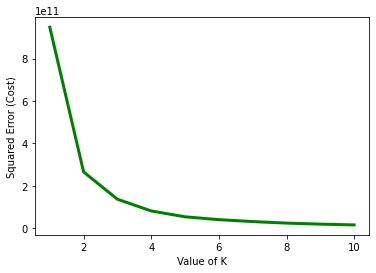

In [67]:
cost =[]
for i in range(1, 11):
    KM = KMeans(init = "k-means++", n_clusters = i, max_iter = 1000)
    KM.fit(x)
    cost.append(KM.inertia_)    

plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() 

In [68]:
KM = KMeans(init = "k-means++", n_clusters = 4, max_iter = 1000)
KM.fit(x)
labels = KM.labels_
print(labels)

[0 1 2 ... 0 0 0]


In [69]:
df["Clus_km"] = labels
df.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Clus_km
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,3
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,0


In [70]:
df.groupby('Clus_km').mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,60517.021138,0.232520,0.783740,49.100813,440.650407,31.133333,170.801626,41.624390,29.252033,58.600000,...,0.260163,0.045528,0.074797,0.000000,0.478049,0.170732,0.276423,713.461789,654.861789,0.224390
1,41290.215289,0.691108,0.638066,48.563183,109.800312,7.879875,44.542902,13.048362,8.031201,25.892356,...,0.260530,0.031201,0.078003,0.001560,0.480499,0.202808,0.237129,183.302652,157.410296,0.135725
2,79299.179283,0.075697,0.266932,49.607570,649.912351,62.876494,441.424303,91.033865,67.934263,74.213147,...,0.254980,0.039841,0.079681,0.000000,0.551793,0.155378,0.213147,1313.181275,1238.968127,0.798805
3,23117.527964,0.785235,0.205817,48.850112,16.677852,5.496644,20.856823,8.033557,5.765101,16.230425,...,0.252796,0.017897,0.138702,0.118568,0.523490,0.114094,0.105145,56.829978,40.599553,0.076063


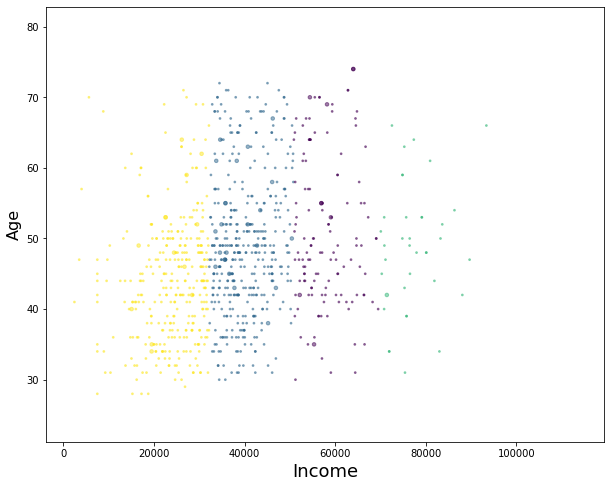

In [71]:
X = np.nan_to_num(x)
plt.figure(figsize = (10, 8))
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 21], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Income', fontsize=18)
plt.ylabel('Age', fontsize=16)

plt.show()


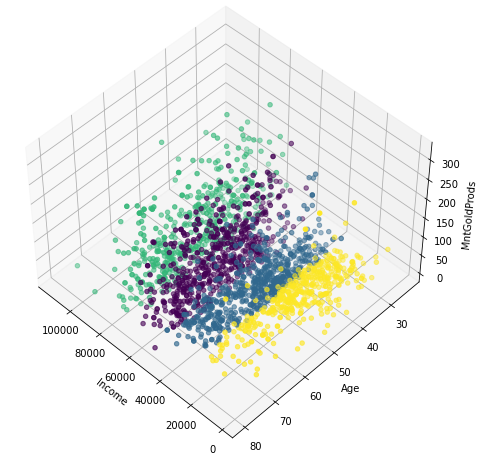

In [72]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('MntGoldProds')

ax.scatter(X[:, 0], X[:, 21], X[:, 9], c= labels.astype(float))
